In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


1.Problem Statement:


In [ ]:
df = pd.read_csv('/content/cardekho_imputated.csv',index_col = [0])

In [ ]:
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


**Shape of the dataset**

In [ ]:
df.shape

(15411, 13)

**Summary of the dataset**

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.00000,15411.00000,15411.00000,15411.00000,15411.00000,15411.00000,15411.00000
mean,6.03634,55616.48063,19.70115,1486.05775,100.58825,5.32548,774971.11641
std,3.01329,51618.54842,4.17126,521.10670,42.97298,0.80763,894128.36326
min,0.00000,100.00000,4.00000,793.00000,38.40000,0.00000,40000.00000
25%,4.00000,30000.00000,17.00000,1197.00000,74.00000,5.00000,385000.00000
50%,6.00000,50000.00000,19.67000,1248.00000,88.50000,5.00000,556000.00000
75%,8.00000,70000.00000,22.70000,1582.00000,117.30000,5.00000,825000.00000
max,29.00000,3800000.00000,33.54000,6592.00000,626.00000,9.00000,39500000.00000


**Report**

* In min and max

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


**Exploring Data**

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {}numeric features : {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 7numeric features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [ ]:
for col in categorical_features:
  print(df[col].value_counts(normalize = True) * 100)
  print('----------------------------------------------')

car_name
Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: proportion, Length: 121, dtype: float64
----------------------------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG         

**Numeric Features**

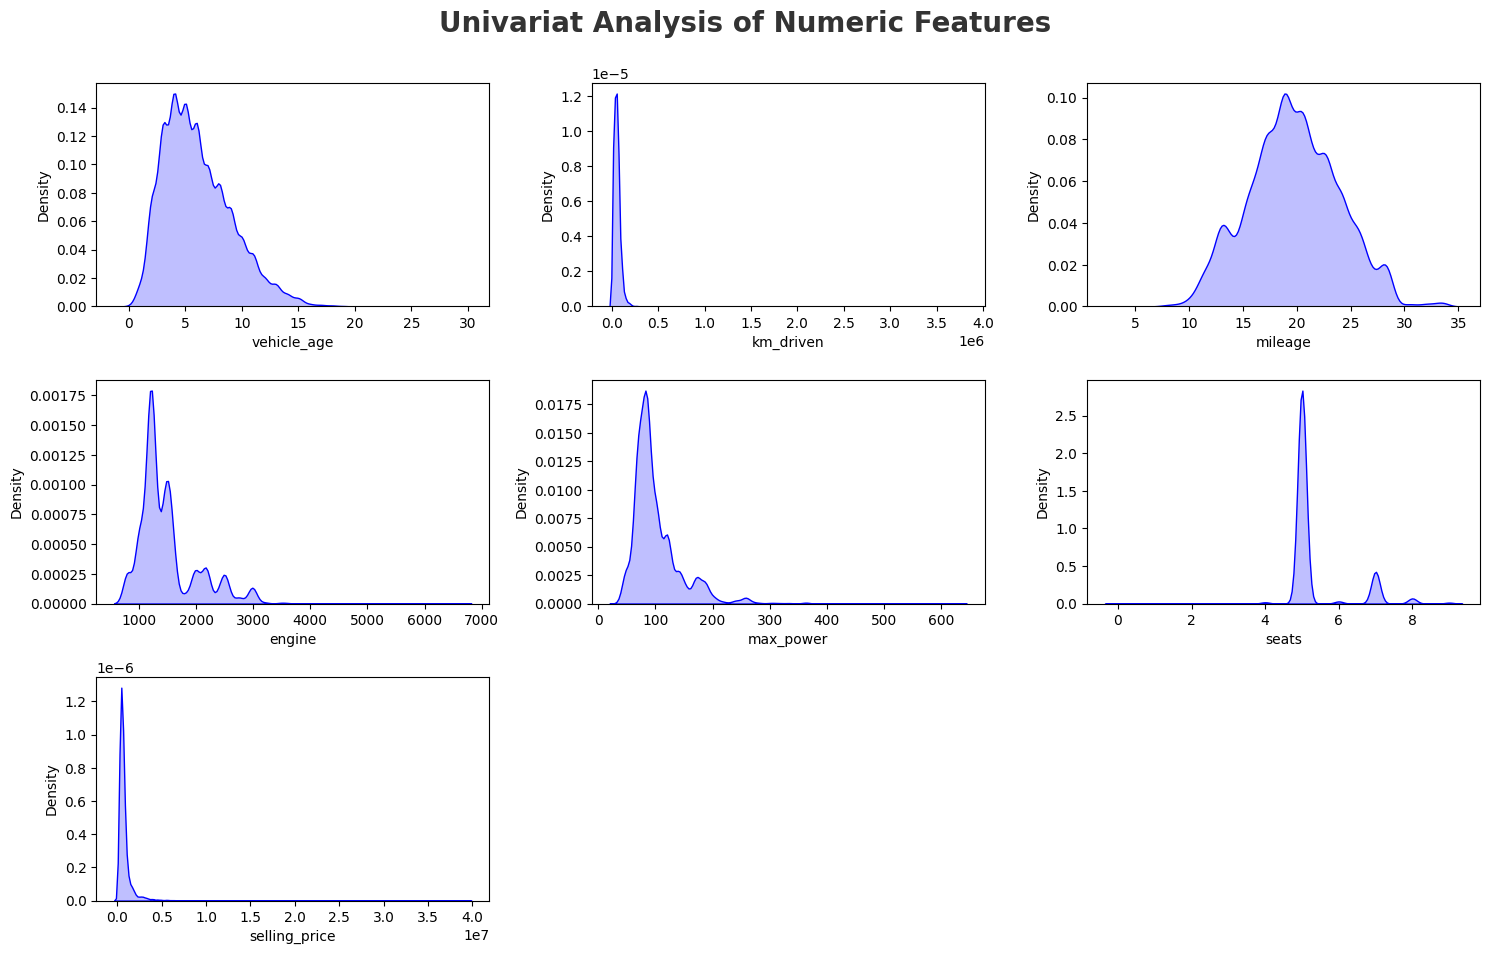

In [ ]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariat Analysis of Numeric Features',fontsize = 20,fontweight = 'bold',alpha = 0.8, y = 1.0)
for i in range (0,len(numeric_features)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x = df[numeric_features[i]],shade = True,color = 'b')
  plt.xlabel(numeric_features[i])
  plt.savefig('univarient.png')
  plt.tight_layout()

**Report**

* Km_driven,engine,max_powerand selling_price are right_skewed,or positively skewed.
* Outliers in Km_driven,selling_price,seats,max_power.

**Categorical features**

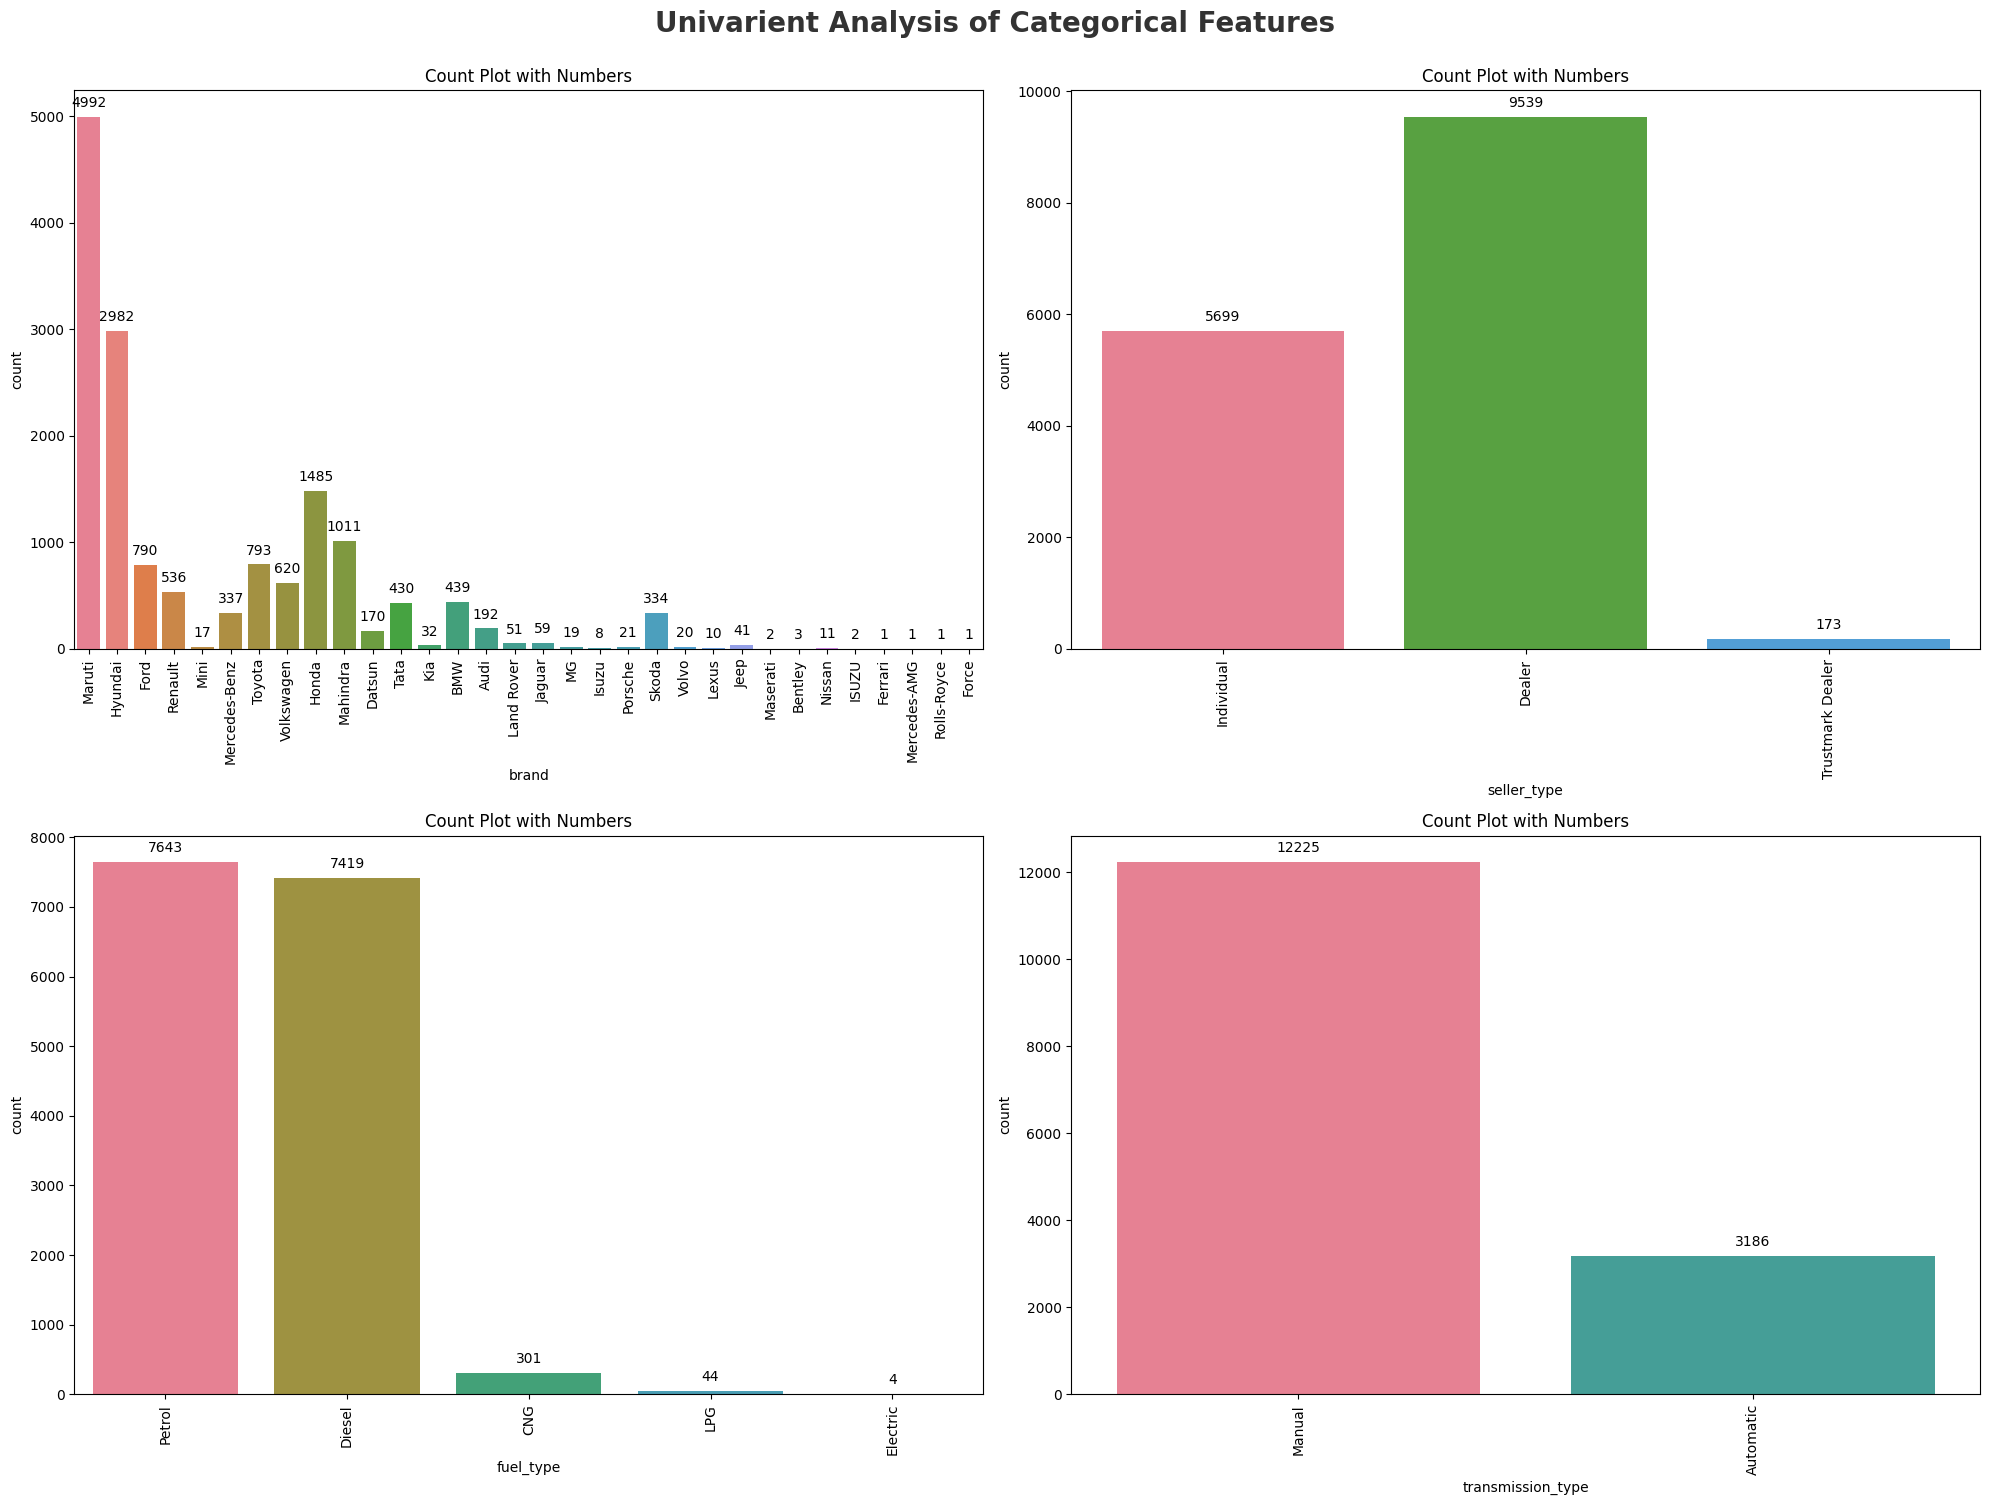

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle('Univarient Analysis of Categorical Features',fontsize = 20,fontweight = 'bold',alpha = 0.8,y = 1)
cat1 = ['brand','seller_type','fuel_type','transmission_type']
for i in range(0,len(cat1)):
  plt.subplot(2,2,i+1)
  ax = sns.countplot(x = df[cat1[i]],palette='husl')
  for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

  plt.title('Count Plot with Numbers')
  plt.xlabel(cat1[i])
  plt.xticks(rotation = 90)
  plt.tight_layout()

**Multivarient Analysis of Numeric_Features**

In [ ]:
df.corr(numeric_only = True)

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


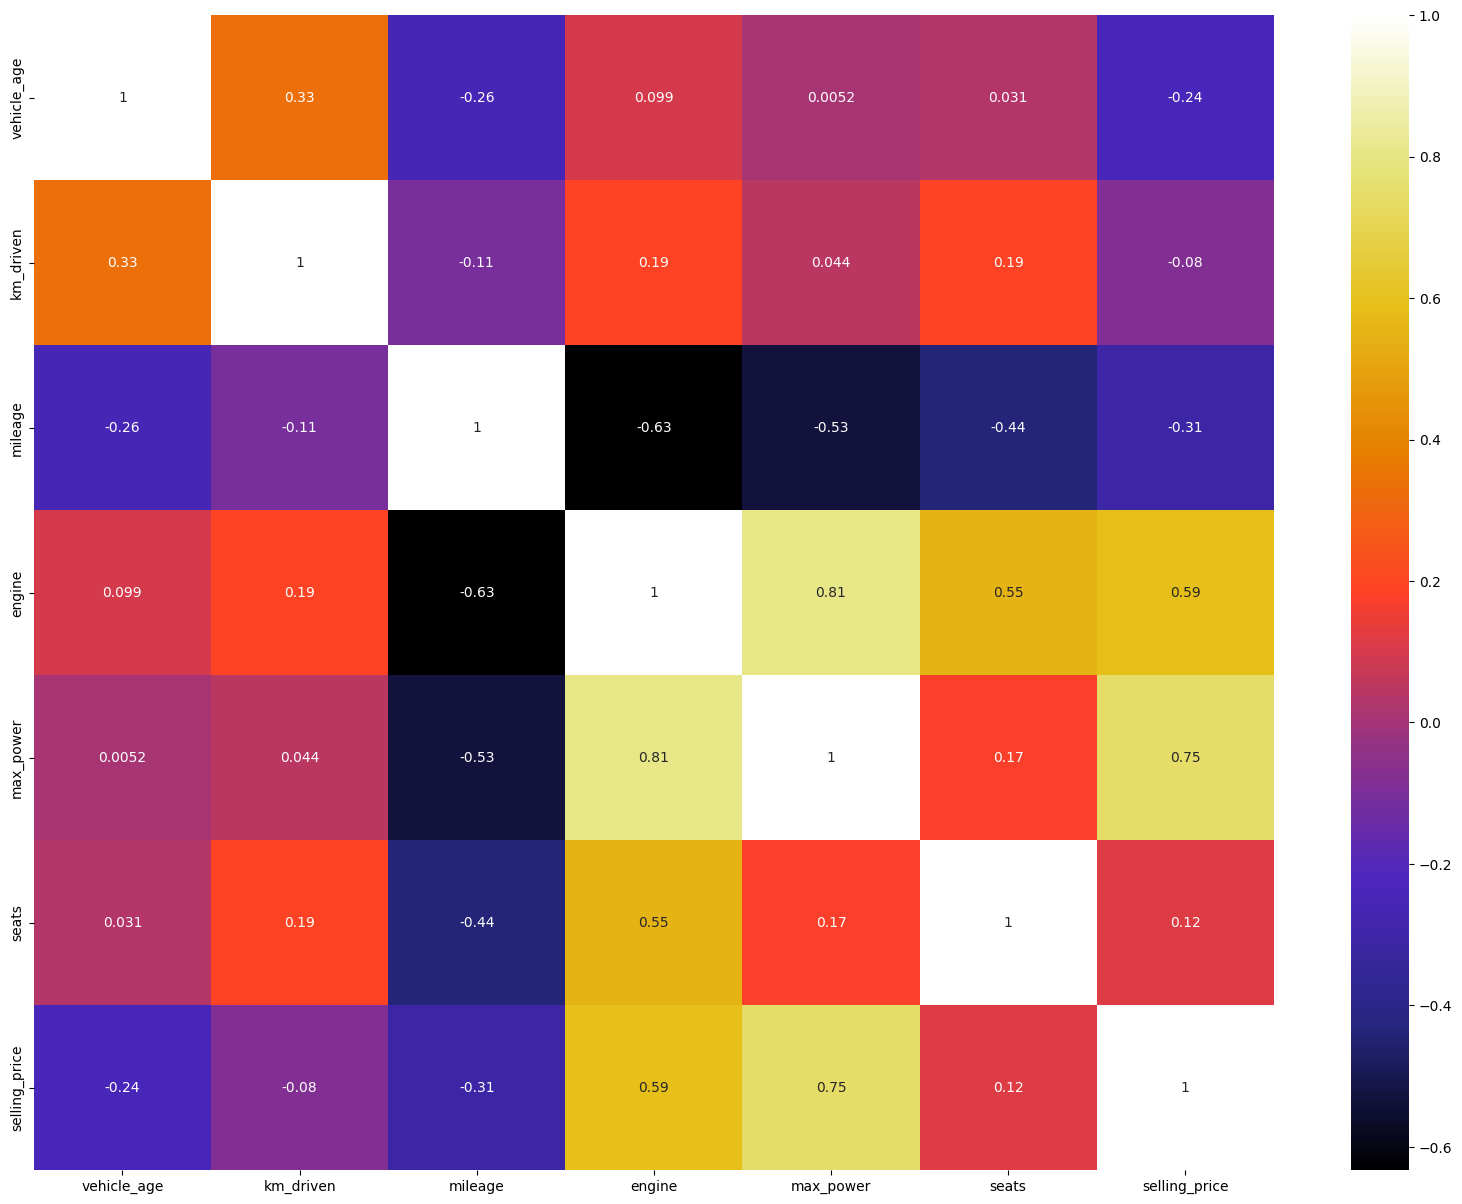

In [ ]:
plt.figure(figsize = (20,15))
# Select only numeric columns for correlation calculation
sns.heatmap(df.select_dtypes(include=['number']).corr(),cmap = 'CMRmap',annot = True)
plt.show()

**Report**

* Our target column Selling_price has a weak correlation an engine and little strong correlation with max_power.


**Check Multicoliinearlity for Categorical features**

In [ ]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
  if chi2_contingency(pd.crosstab(df['selling_price'],df[feature]))[1] < 0.05:
    chi2_test.append("Reject Null Hypothesis")
  else:
    chi2_test.append('Fail to Reject Null Hypothesis')
result =pd.DataFrame(data = [categorical_features,chi2_test]).T
result.columns =['Column','Hypothesis Result']
result

,Column,Hypothesis Result
0,car_name,Reject Null Hypothesis
1,brand,Reject Null Hypothesis
2,model,Reject Null Hypothesis
3,seller_type,Reject Null Hypothesis
4,fuel_type,Reject Null Hypothesis
5,transmission_type,Reject Null Hypothesis


**Report**

* Here all are to reject null hypothesis which means it doesn't correlate with target column.

**Check Null Values**

In [ ]:
df.isnull().sum()

,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0
engine,0


In [ ]:
continuous_features = [feature for feature in df.columns if len(df[feature].unique())>=10]
print('Num of continuous fetures :',continuous_features)

Num of continuous fetures : ['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


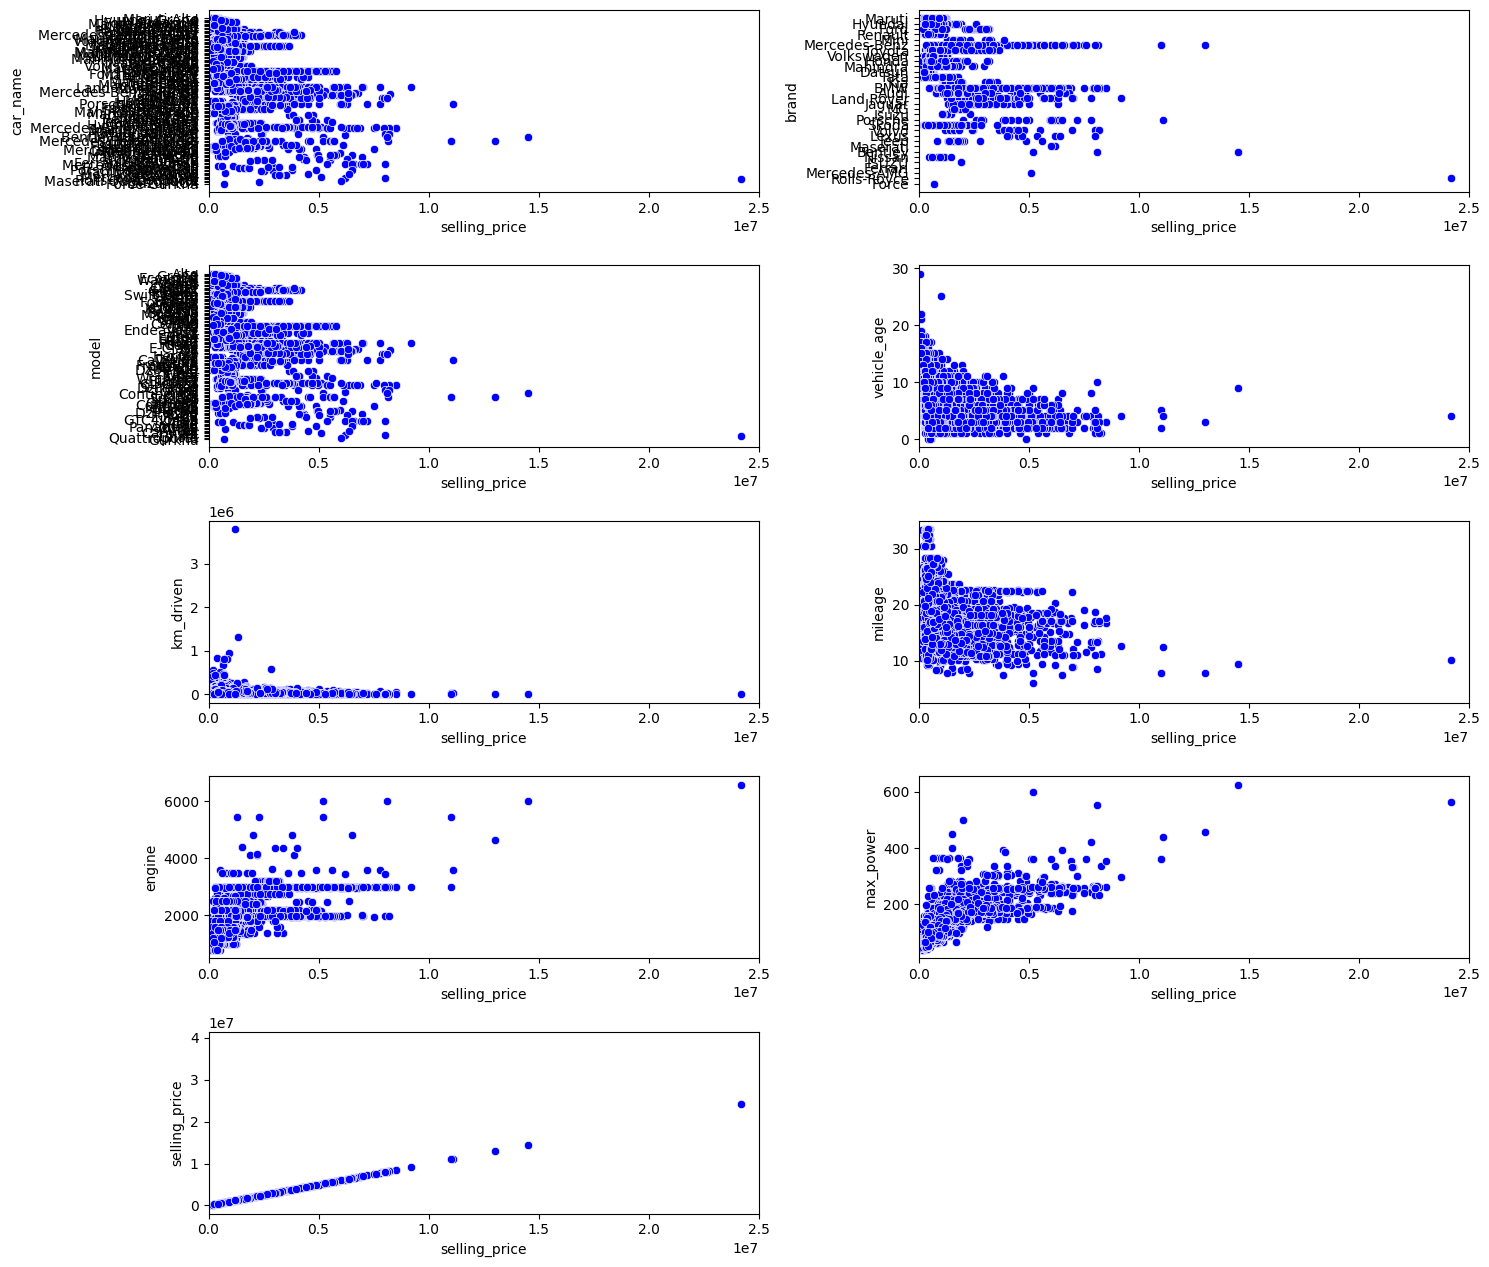

In [ ]:
fig = plt.figure(figsize = (15,20))
for i in range(0,len(continuous_features)):
  ax = plt.subplot(8,2,i+1)
  sns.scatterplot(data =df ,x = 'selling_price',y = continuous_features[i],color = 'b')
  plt.xlim(0,25000000)
  plt.tight_layout()

**Report**

* Lower Vehile age has more selling_price than vehicle with more age.
* Engine CC has positive effect on price,vechile with 20000 cc and below are mostly priced below 5 lakhs.
* Kms driven has negative effect on selling price.

**Visulization**

**1.1 Visualization the Target Features**

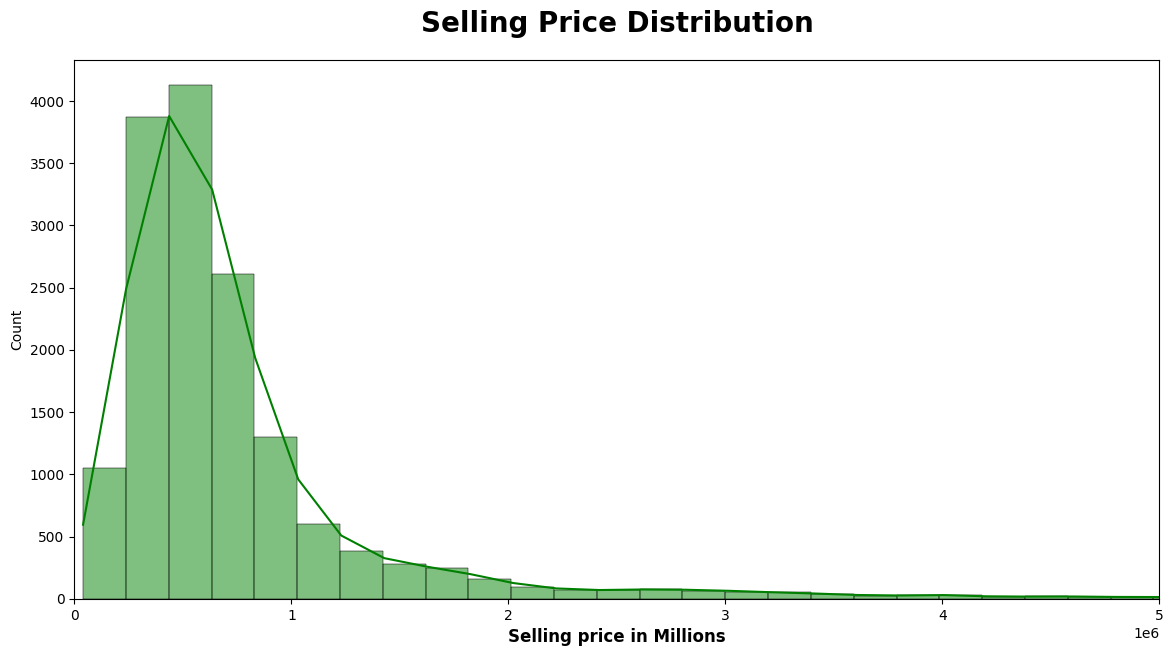

In [ ]:
plt.subplots(figsize = (14,7))
sns.histplot(df.selling_price,bins = 200,kde = True,color = 'g')
plt.title('Selling Price Distribution',weight = 'bold',fontsize = 20,pad = 20)
plt.xlabel('Selling price in Millions',weight = 'bold',fontsize = 12)
plt.xlim(0,5000000)
plt.show()

* From this chart it is clear that the target variable skewed.

In [ ]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [ ]:
df.car_name.value_counts()[0:10]

,count
car_name,
Hyundai i20,906
Maruti Swift Dzire,890
Maruti Swift,781
Maruti Alto,778
Honda City,757
Maruti Wagon R,717
Hyundai Grand,580
Toyota Innova,545
Hyundai Verna,492


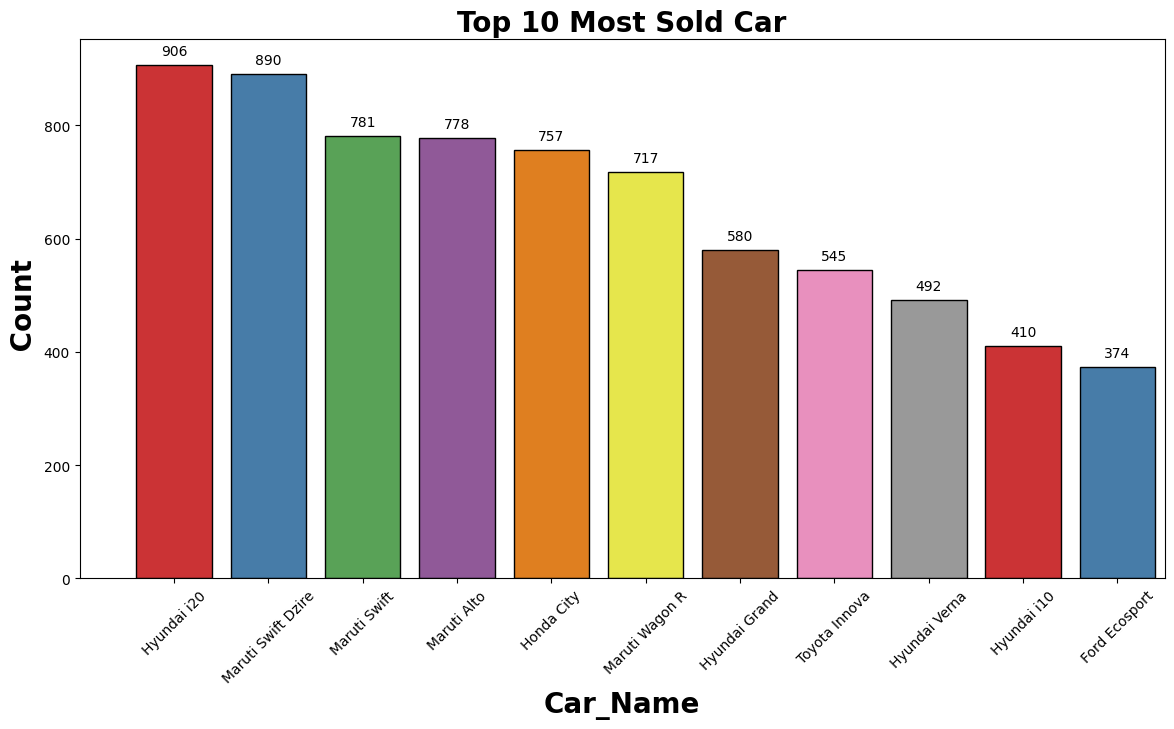

In [ ]:
plt.subplots(figsize = (14,7))
ax = sns.countplot(x = 'car_name',data = df,ec = 'black',palette = 'Set1',order = df['car_name'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title('Top 10 Most Sold Car',weight = 'bold',fontsize = 20)
plt.ylabel(' Count',weight = 'bold',fontsize = 20)
plt.xlabel('Car_Name',weight = 'bold',fontsize = 20)
plt.xticks(rotation = 45)
plt.xlim(-1,10.5)
plt.show()

In [ ]:
i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20:.2f} Rupees')

The mean price of Hyundai i20 is 543603.75 Rupees


In [ ]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [ ]:
df.brand.value_counts()[0:10]

,count
brand,
Maruti,4992
Hyundai,2982
Honda,1485
Mahindra,1011
Toyota,793
Ford,790
Volkswagen,620
Renault,536
BMW,439


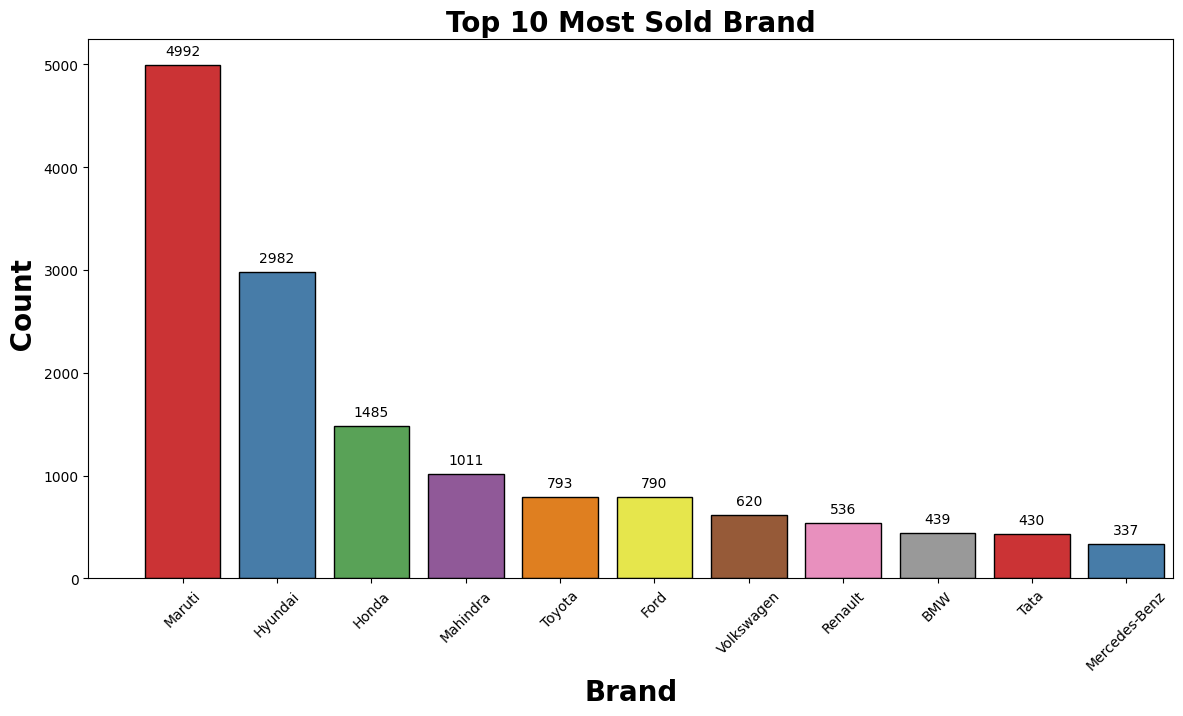

In [ ]:
plt.subplots(figsize = (14,7))
ax = sns.countplot(x = 'brand',data = df,ec = 'black',palette = 'Set1',order = df['brand'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title('Top 10 Most Sold Brand',weight = 'bold',fontsize = 20)
plt.ylabel(' Count',weight = 'bold',fontsize = 20)
plt.xlabel('Brand',weight = 'bold',fontsize = 20)
plt.xticks(rotation = 45)
plt.xlim(-1,10.5)
plt.show()

In [ ]:
Maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {Maruti:.2f} Rupees')

The mean price of Maruti is 487089.32 Rupees


Report

*  Maruti the mean price is 4.8lakhs.
* Following Maruti we have hyundai and Honda.

**Costliest Brand**

In [ ]:
brand = df.groupby('brand').selling_price.max()
brand_df = brand.to_frame().sort_values('selling_price',ascending = False)[0:10]
brand_df

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


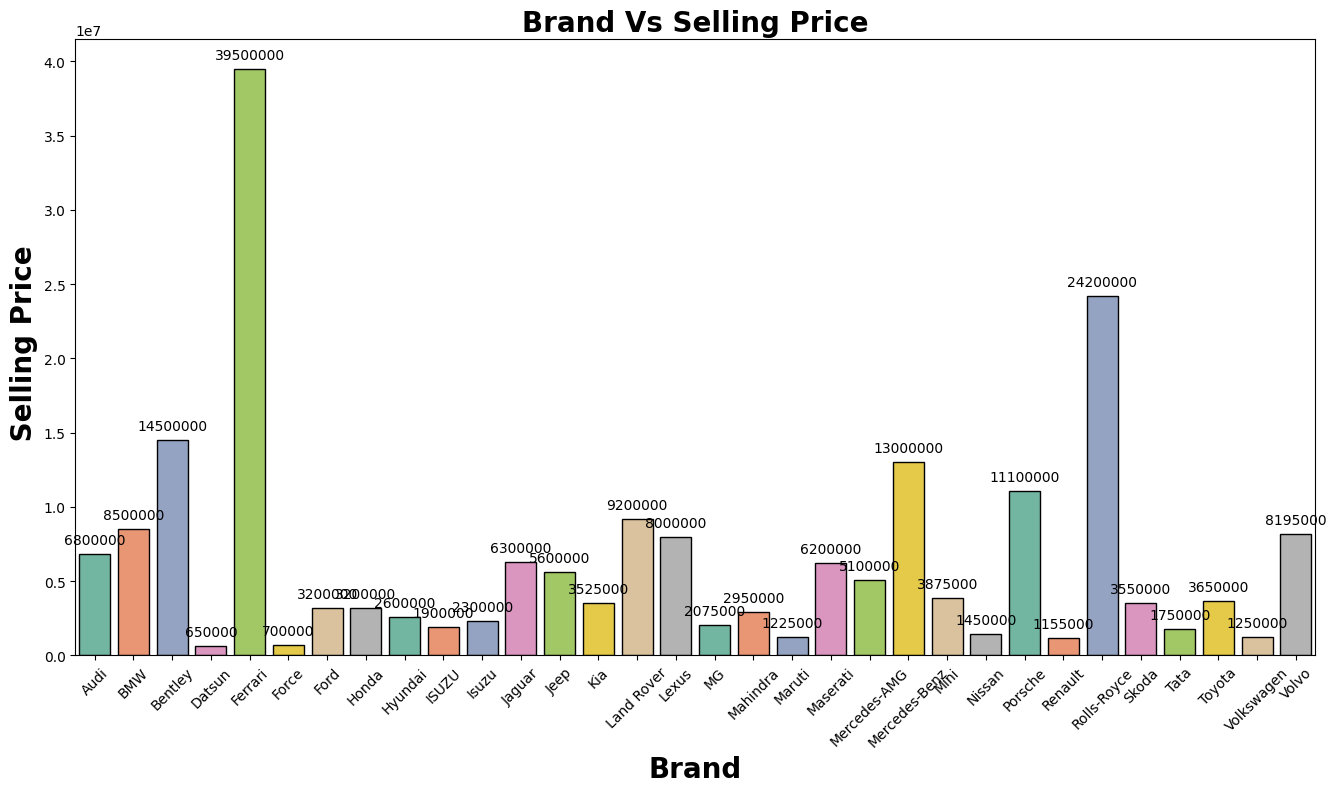

In [ ]:
plt.subplots(figsize = (16,8))
ax = sns.barplot(x = brand.index,y = brand.values,ec = 'black',palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title('Brand Vs Selling Price',weight = 'bold',fontsize = 20)
plt.ylabel(' Selling Price',weight = 'bold',fontsize = 20)
plt.xlabel('Brand',weight = 'bold',fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

Report:

* Costliest Brand sold is Ferrari at 3.95 crores.
* Second most costliest car Brand is Rolls-Royce as 2.42 crores.
* Brand name has very clear impact on selling price.

**Costliest Car**

In [ ]:
car = df.groupby('car_name').selling_price.max()
car = car.to_frame().sort_values('selling_price',ascending = False)[0:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


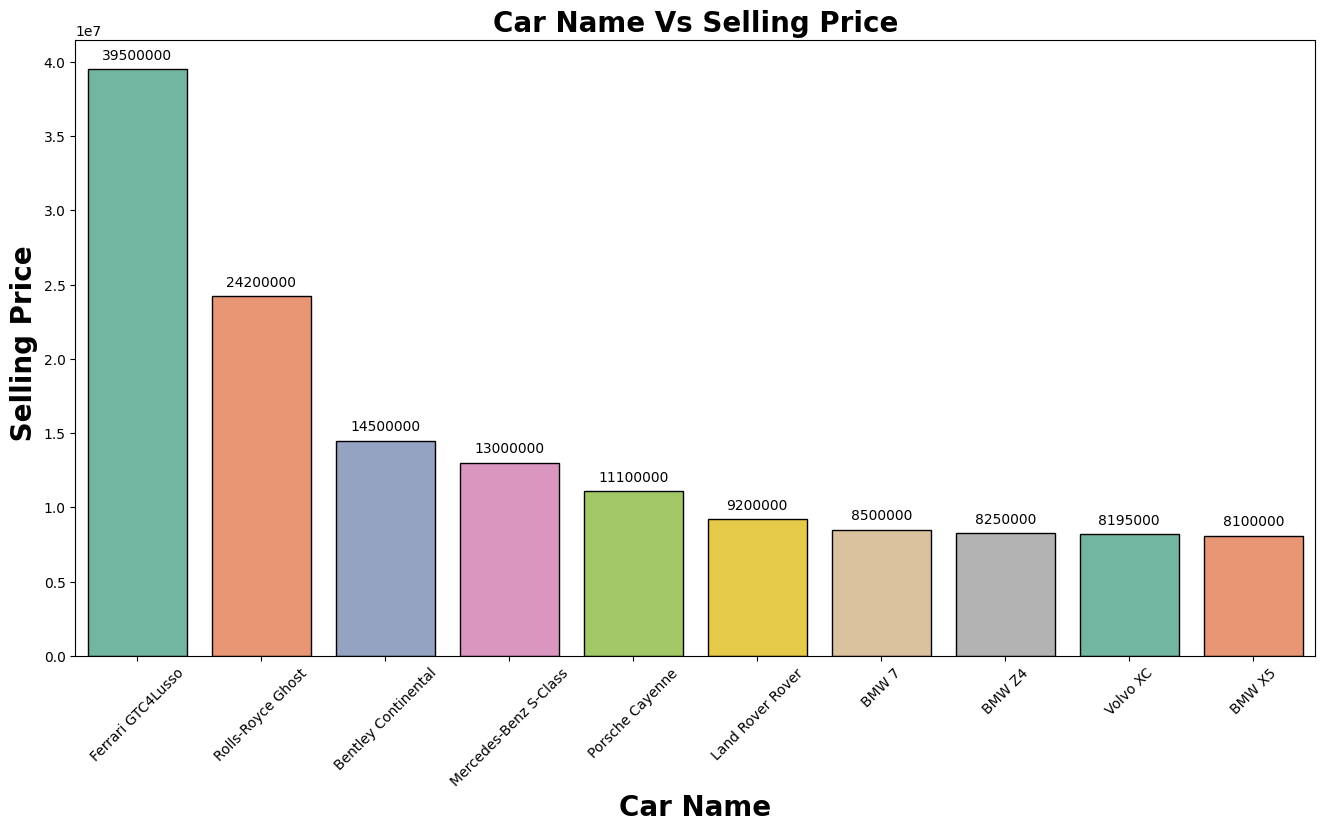

In [ ]:
plt.subplots(figsize = (16,8))
ax = sns.barplot(x = car.index,y = car.selling_price,ec = 'black',palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title('Car Name Vs Selling Price',weight = 'bold',fontsize = 20)
plt.ylabel(' Selling Price',weight = 'bold',fontsize = 20)
plt.xlabel('Car Name',weight = 'bold',fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

**Report:**

* Costliest car Ferrari GTC4Lusso at 3.95 crores.
* Second most costliest car is Rolls-Royce Ghost at 2.42 crores.
* Car name has very clear impact on selling price.

In [ ]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

**CarName vs Highest millage**

In [ ]:
mileage = df.groupby('car_name')['mileage'].mean().sort_values(ascending = False).head(20)
mileage.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


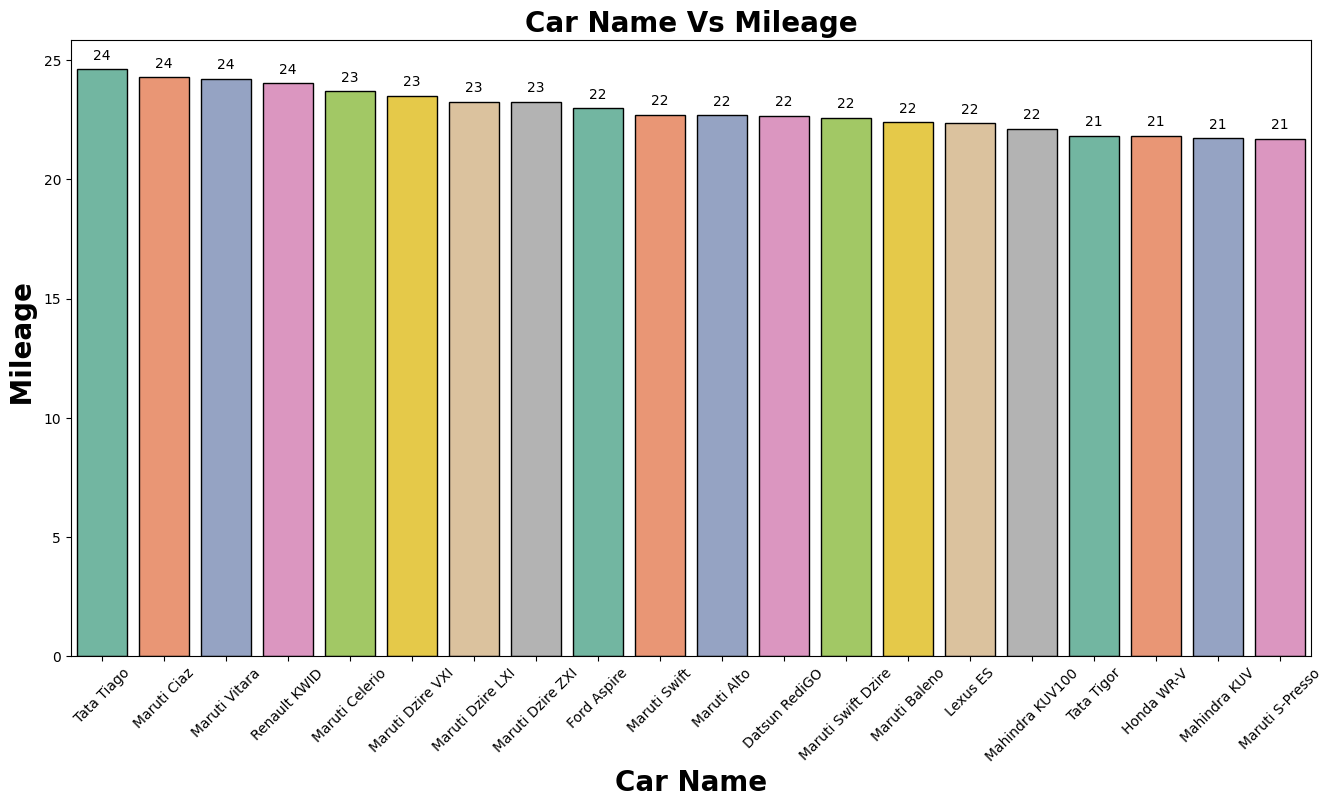

In [ ]:
plt.subplots(figsize = (16,8))
ax = sns.barplot(x = mileage.index,y = mileage.values,ec = 'black',palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title('Car Name Vs Mileage',weight = 'bold',fontsize = 20)
plt.ylabel(' Mileage',weight = 'bold',fontsize = 20)
plt.xlabel('Car Name',weight = 'bold',fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

**Report:**
* Tata Tiago,Maruti Ciaz,Maruti vitara,Renault Kwid have same millage and next following others.

**Car_name Vs Lower Mileage**

In [ ]:
mileage_least = df.groupby('car_name')['mileage'].mean().sort_values(ascending = True).head(20)
mileage_least.to_frame()

,mileage
car_name,
Ferrari GTC4Lusso,4.000000
Bentley Continental,8.033333
Jeep Wrangler,9.500000
Rolls-Royce Ghost,10.200000
Mercedes-Benz GLS,10.475000
BMW Z4,10.523333
Porsche Panamera,10.950000
Ford Endeavour,11.603191
Mercedes-Benz S-Class,11.639459


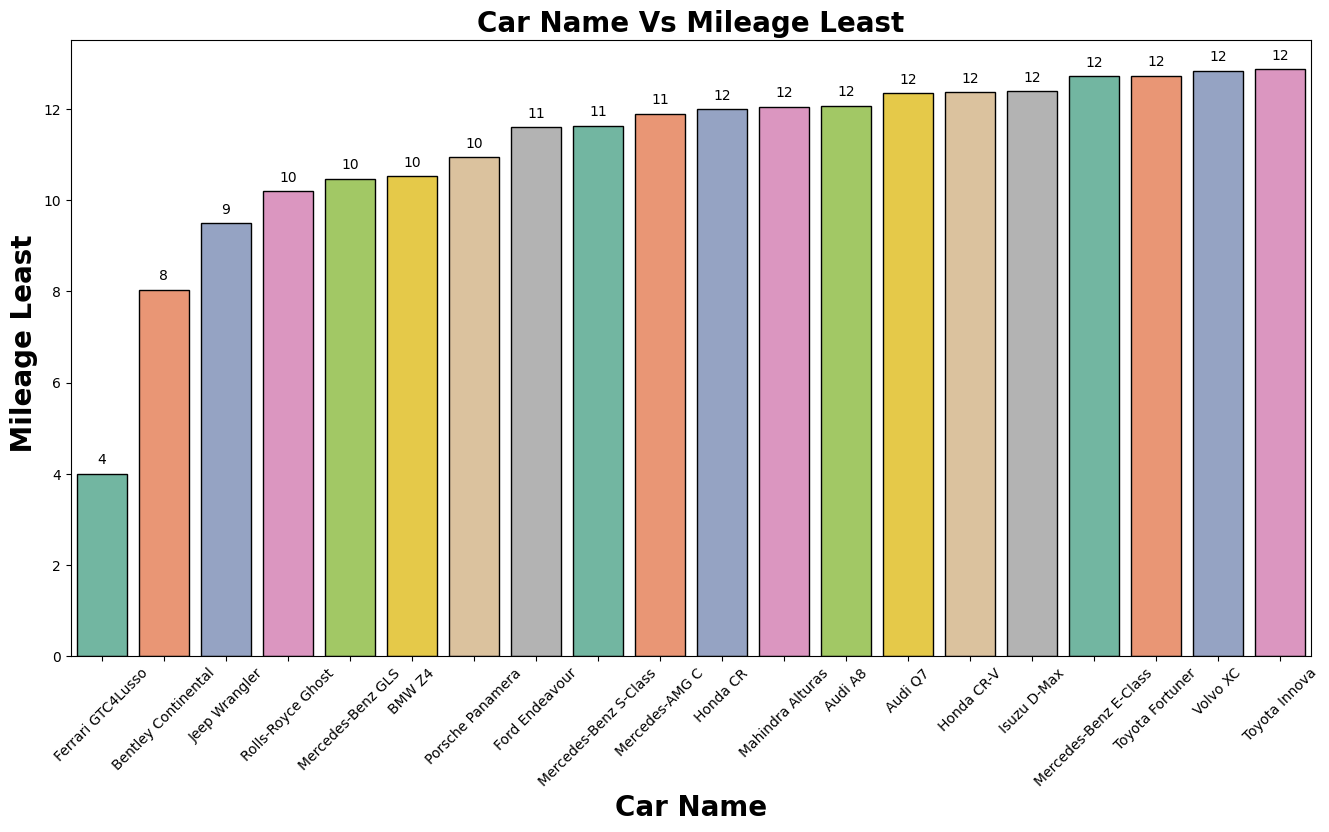

In [ ]:
plt.subplots(figsize = (16,8))
ax = sns.barplot(x = mileage_least.index,y = mileage_least.values,ec = 'black',palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title('Car Name Vs Mileage Least',weight = 'bold',fontsize = 20)
plt.ylabel(' Mileage Least',weight = 'bold',fontsize = 20)
plt.xlabel('Car Name',weight = 'bold',fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

Report:

* Ferrari GTC4LUsso has lower millage and comparing highest selling_price.


**CostliestBrand vs Milllage**

In [ ]:
mileage_high = df.groupby('brand')['mileage'].mean().sort_values(ascending = False).head(20)
mileage_high.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


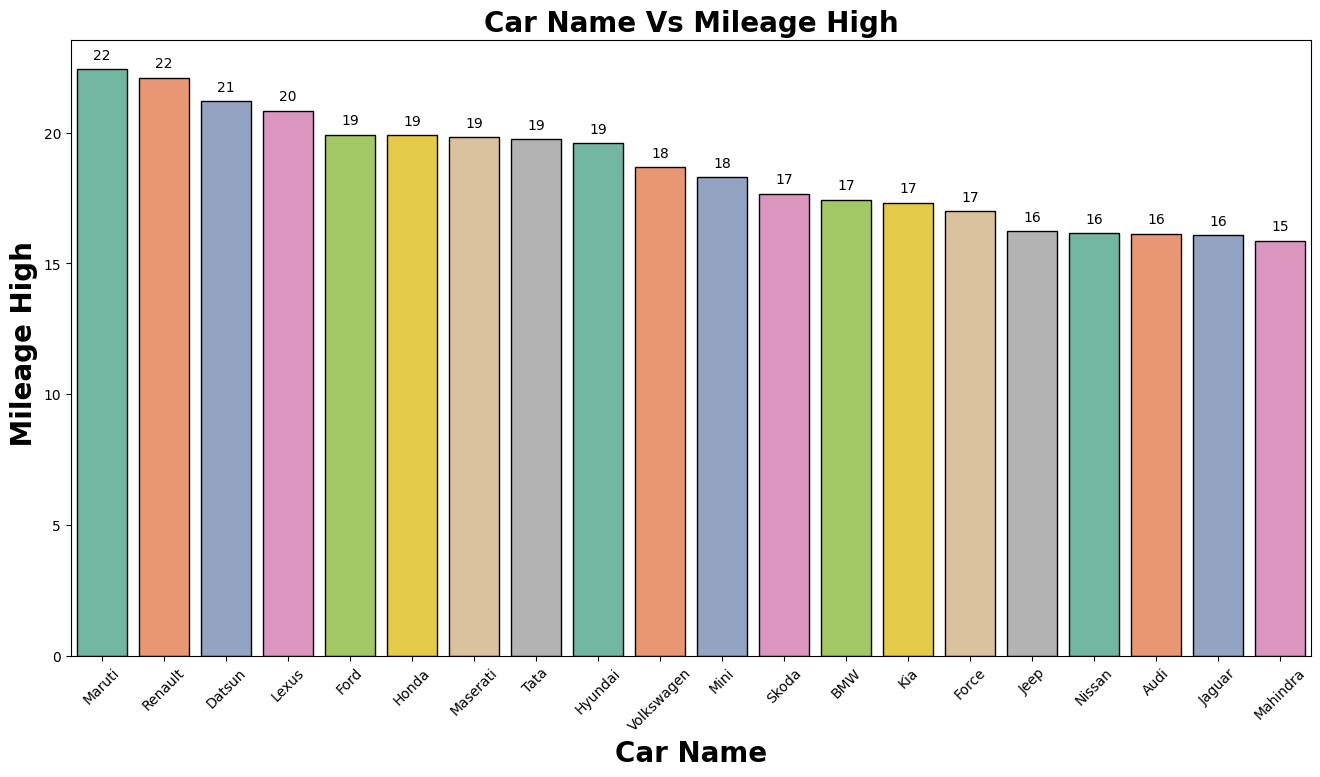

In [ ]:
plt.subplots(figsize = (16,8))
ax = sns.barplot(x = mileage_high.index,y = mileage_high.values,ec = 'black',palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title('Car Name Vs Mileage High',weight = 'bold',fontsize = 20)
plt.ylabel(' Mileage High',weight = 'bold',fontsize = 20)
plt.xlabel('Car Name',weight = 'bold',fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

**Report:**

* Maruti has a highet millage.
* Second most is Renault and so on.

In [ ]:
mileage_low = df.groupby('brand')['mileage'].mean().sort_values(ascending = True).head(20)
mileage_low.to_frame()

,mileage
brand,
Ferrari,4.000000
Bentley,8.033333
Rolls-Royce,10.200000
Mercedes-AMG,11.900000
Isuzu,12.575000
Land Rover,13.030392
Toyota,13.214073
Porsche,13.515714
Mercedes-Benz,13.535757


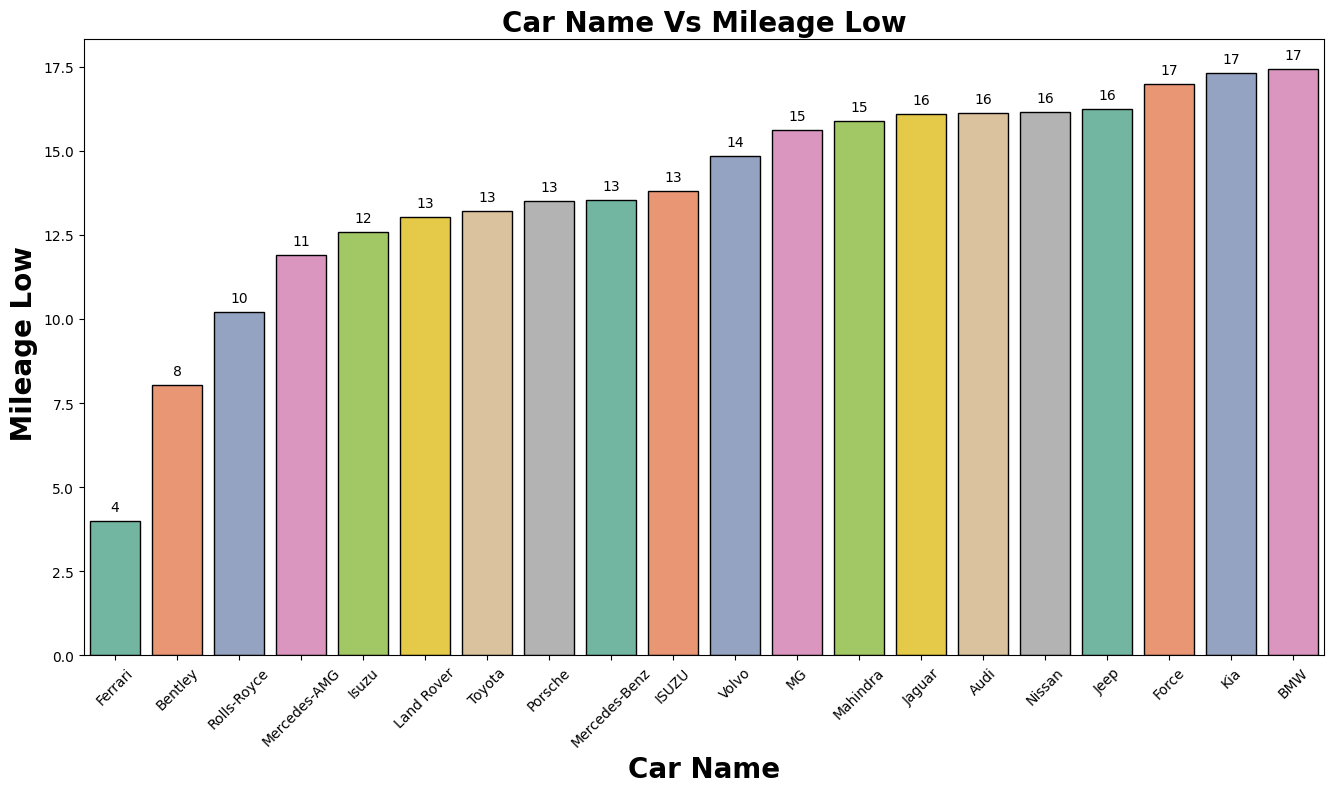

In [ ]:
plt.subplots(figsize = (16,8))
ax = sns.barplot(x = mileage_low.index,y = mileage_low.values,ec = 'black',palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.title('Car Name Vs Mileage Low',weight = 'bold',fontsize = 20)
plt.ylabel(' Mileage Low',weight = 'bold',fontsize = 20)
plt.xlabel('Car Name',weight = 'bold',fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

Report:

* Ferrari is a lowest millage compared to others and it is a costliest car

**Kilometer driven vs Selling Price**

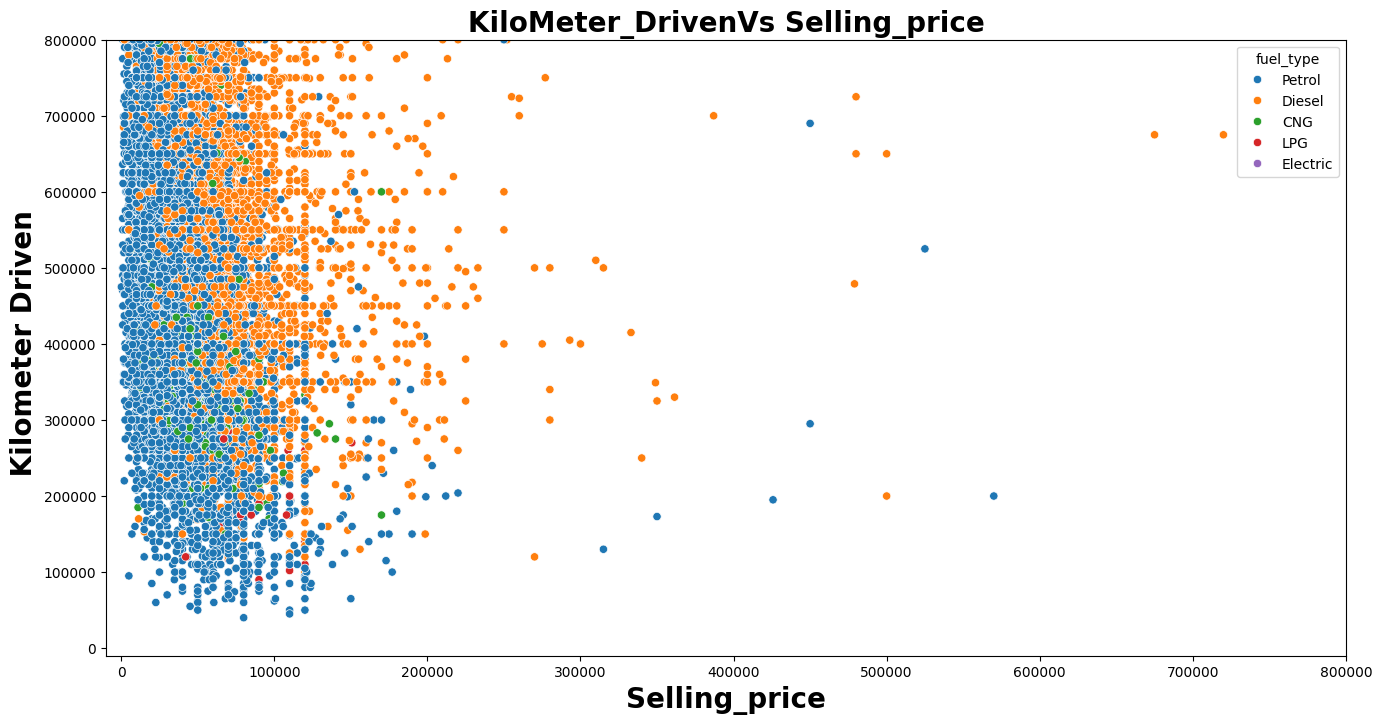

In [ ]:
plt.subplots(figsize = (16,8))
sns.scatterplot(x = 'km_driven',y = 'selling_price',data = df,ec = 'white',color = 'b',hue = 'fuel_type')
plt.title('KiloMeter_DrivenVs Selling_price',weight = 'bold',fontsize = 20)
plt.ylabel(' Kilometer Driven',weight = 'bold',fontsize = 20)
plt.xlim(-10000,800000)
plt.ylim(-10000,800000)
plt.xlabel('Selling_price',weight = 'bold',fontsize = 20)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB
